### Complexity Analysis with an Autoregressive Model
We use an autoregressive model with order $K$ and length $N$ expressed as follows: <br>
\begin{align}
y_i &\sim \mathcal{N}(y_{i-1} + ... + y_{i-K}, 1) \quad \text{for } i = 0, \ldots, N-1, \\
y_i &= 0 \quad \text{for } i = -K, \ldots, -1.
\end{align}

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("../")
sys.path.append("../..")
sys.dont_write_bytecode = True

from scipy import stats
from util import plot_mean_and_ci

log_dir = "logs"

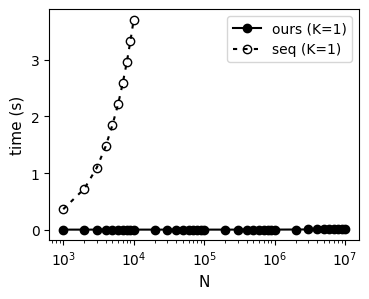

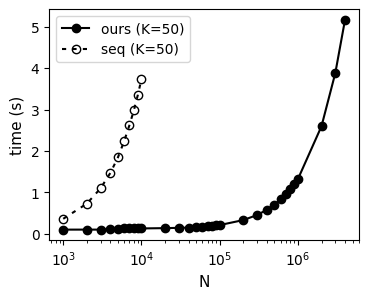

In [2]:
# for K in [1, 10, 30, 50]:
for K in [1, 50]:
    fig, ax = plt.subplots(figsize=(4, 3))

    df = pd.read_csv(os.path.join(log_dir, f"complexity_ours_K_{K}.log"), header=None, skiprows=1)
    Ns = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(ax, Ns, times, label=f"ours (K={K})",
                     fmt="-o", color="black",
                     markersize=6, fill_between=False)
    
    df = pd.read_csv(os.path.join(log_dir, f"complexity_seq_K_{K}.log"), header=None, skiprows=1)
    Ns = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(ax, Ns, times, label=f"seq (K={K})",
                        fmt="--o", color="black", dashes=(2, 3),
                        markerfacecolor="none", markersize=6, fill_between=False)

    plt.xscale("log")
    plt.xlabel("N", fontsize=11)
    plt.ylabel("time (s)", fontsize=11)
    plt.legend()
    plt.show()

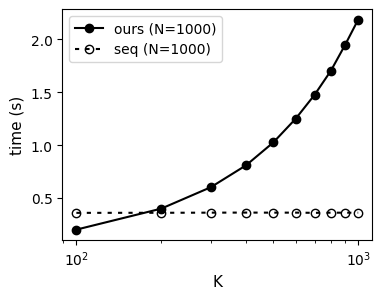

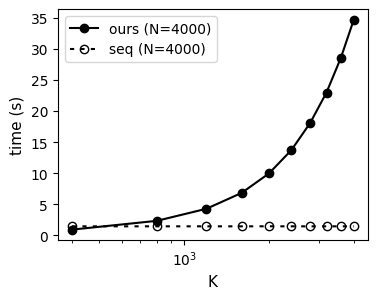

In [ ]:
# for N in [1000, 2000, 3000, 4000]:
for N in [1000, 4000]:
    fig, ax = plt.subplots(figsize=(4, 3))

    df = pd.read_csv(os.path.join(log_dir, f"complexity_ours_N_{N}.log"), header=None, skiprows=1)
    Ks = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(ax, Ks, times, label=f"ours (N={N})",
                     fmt="-o", color="black",
                     markersize=6, fill_between=False)

    df = pd.read_csv(os.path.join(log_dir, f"complexity_seq_N_{N}.log"), header=None, skiprows=1)
    Ks = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(ax, Ks, times, label=f"seq (N={N})",
                     fmt="--o", color="black", dashes=(2, 3),
                     markerfacecolor="none", markersize=6, fill_between=False)
                    
    plt.xscale("log")
    plt.xlabel("K", fontsize=11)
    plt.ylabel("time (s)", fontsize=11)
    plt.legend()
    plt.show()

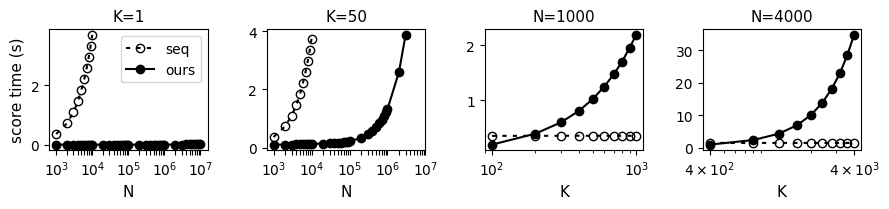

In [8]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, axes = plt.subplots(1, 4, figsize=(9, 2.2))

for i, K in enumerate([1, 50]):
    df = pd.read_csv(os.path.join(log_dir, f"complexity_seq_K_{K}.log"), header=None, skiprows=1)
    Ns = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(axes[i], Ns, times, label="seq",
                        fmt="--o", color="black", dashes=(2, 3),
                        markerfacecolor="none", markersize=6, fill_between=False)

    df = pd.read_csv(os.path.join(log_dir, f"complexity_ours_K_{K}.log"), header=None, skiprows=1)
    Ns = df.loc[1::2, 0].values if K == 1 else df.loc[1:60:2, 0].values
    times = df.loc[1::2, 2:].values if K == 1 else df.loc[1:60:2, 2:].values
    plot_mean_and_ci(axes[i], Ns, times, label="ours",
                     fmt="-o", color="black",
                     markersize=6, fill_between=False)

    axes[i].set_xscale("log")
    axes[i].set_xlabel("N", fontsize=11)
    axes[i].set_title(f"K={K}", fontsize=11)

for i, N in enumerate([1000, 4000]):
    df = pd.read_csv(os.path.join(log_dir, f"complexity_seq_N_{N}.log"), header=None, skiprows=1)
    Ks = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(axes[2+i], Ks, times, label="seq",
                     fmt="--o", color="black", dashes=(2, 3),
                     markerfacecolor="none", markersize=6, fill_between=False)
    
    df = pd.read_csv(os.path.join(log_dir, f"complexity_ours_N_{N}.log"), header=None, skiprows=1)
    Ks = df.loc[1::2, 0].values
    times = df.loc[1::2, 2:].values
    plot_mean_and_ci(axes[2+i], Ks, times, label="ours",
                     fmt="-o", color="black",
                     markersize=6, fill_between=False)

    axes[2+i].set_xscale("log")
    axes[2+i].set_xlabel("K", fontsize=11)
    axes[2+i].set_title(f"N={N}", fontsize=11)


axes[0].set_ylabel("score time (s)", fontsize=11)
axes[0].set_xticks(np.concatenate([np.arange(1, 10) * i for i in [1000, 10000, 100000, 1000000]] + [[10000000]]))
axes[1].set_xticks(np.concatenate([np.arange(1, 10) * i for i in [1000, 10000, 100000, 1000000]] + [[10000000]]))
axes[3].set_xticks([400, 4000])
axes[3].set_xticklabels(["$4 \\times 10^2$", "$4 \\times 10^3$"])

axes[0].legend()
plt.tight_layout()
# plt.savefig("scalability.pdf", dpi=1000)
plt.show()

In [6]:
ci = 0.95
n_sample = 99
relative_ci_width = []

for method in ["ours", "seq"]:
    for K in [1, 50]:
        df = pd.read_csv(os.path.join(log_dir, f"complexity_{method}_K_{K}.log"), header=None, skiprows=1)
        times = df.loc[::2, 2:].values
        times = times[~np.isnan(times).any(axis=1)]

        std_y = np.std(times, axis=1, ddof=1)  # (n_data,)
        conf = std_y * stats.t.ppf((1 + ci) / 2, n_sample - 1) / np.sqrt(n_sample)  # (n_data,)
        relative_ci_width.append((conf / times.mean(axis=1)).max())


    for N in [1000, 4000]:
        df = pd.read_csv(os.path.join(log_dir, f"complexity_{method}_N_{N}.log"), header=None, skiprows=1)
        times = df.loc[::2, 2:].values
        times = times[~np.isnan(times).any(axis=1)]

        std_y = np.std(times, axis=1, ddof=1)  # (n_data,)
        conf = std_y * stats.t.ppf((1 + ci) / 2, n_sample - 1) / np.sqrt(n_sample)  # (n_data,)
        relative_ci_width.append((conf / times.mean(axis=1)).max())

print("maximum relative ci width to the mean:", max(relative_ci_width))

maximum relative ci width to the mean: 0.01910550486418768
